In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv("data.csv", sep='\s*,\s*', engine='python')
sns.set_style("ticks")
# data.head()

In [3]:
timeSerial = data[data['ranks'] == 2]['time'].mean()
data['speedup'] = timeSerial / data['time']
data['numTasks'] = ["$%s$" % x for x in data['ntasks']]
data['eff'] = data['speedup'] / (data['ranks'] -1)
data.head(25)

ranks    nx    ny  ntasks       time   speedup numTasks       eff
0      2  4001  4001      50  16.824098  1.005595     $50$  1.005595
1      2  4001  4001     100  17.012376  0.994466    $100$  0.994466
2      4  4001  4001      50   8.088005  2.091769     $50$  0.697256
3      4  4001  4001     100   7.838494  2.158353    $100$  0.719451
4      6  4001  4001      50   7.292468  2.319961     $50$  0.463992
5      6  4001  4001     100   6.380821  2.651420    $100$  0.530284
6      8  4001  4001      50   6.809630  2.484457     $50$  0.354922
7      8  4001  4001     100   6.006506  2.816652    $100$  0.402379

In [7]:
linSU = []
for i in data['ranks'].unique():
    linSU.append([i,i -1,timeSerial / (i -1)])
linSU = pd.DataFrame(linSU, columns=['x', 'speedup', 'time'])
linSU

x  speedup       time
0  2        1  16.918237
1  4        3   5.639412
2  6        5   3.383647
3  8        7   2.416891

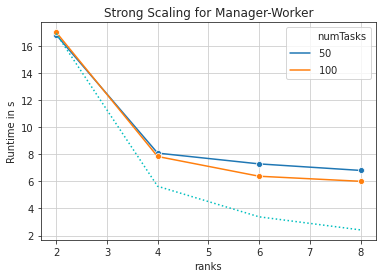

In [9]:
ax1 = sns.lineplot(data=data, x='ranks', y='time', hue='numTasks', marker='o')

# Add linear speedup line + seq time hline
ax1.plot(linSU['x'], linSU['time'], c='c', ls=':')

# Set plot properties
ax1.set(yscale="linear", ylabel='Runtime in s', xlabel='ranks', 
        title='Strong Scaling for Manager-Worker')

plt.grid(True, 'major')
plt.grid(True, 'minor', color='0.85', linestyle='-', linewidth=0.5)
plt.savefig("mandel-time.pdf", bbox_inches='tight')

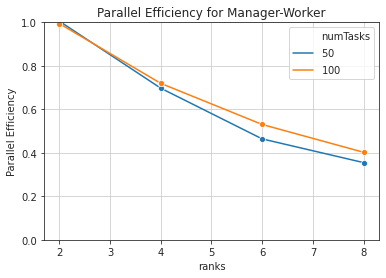

In [10]:
# Parallel Efficiency
plt.clf()
ax1 = sns.lineplot(data=data, x='ranks', y='eff', hue='numTasks', marker='o')

# Add linear speedup line + seq time hline
# ax1.plot(linSU['x'], linSU['time'], c='c', ls=':')
# plt.axhline(y=time_serial, color='r', linestyle=':')

# Set plot properties
ax1.set(yscale="linear", ylabel='Parallel Efficiency', xlabel='ranks', 
        title='Parallel Efficiency for Manager-Worker')
plt.ylim(0,1)

plt.grid(True, 'major')
plt.grid(True, 'minor', color='0.85', linestyle='-', linewidth=0.5)
plt.savefig("mandel-eff.pdf", bbox_inches='tight')